In [100]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from plotter import Plotter
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

- Loading the Labeled Faces in the Wild (LFW) dataset

In [47]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
# Getting values for plotting
n_samples, h, w = lfw_people.images.shape

- Preparing the feature set

In [48]:
X = lfw_people.data
n_features = X.shape[1]

- Preparing the target set

In [49]:
y = lfw_people.target
n_classes = lfw_people.target_names.shape[0]

- Presenting information about the dataset size

In [50]:
print(f"n_samples: {n_samples}")
print(f"n_features: {n_features}")
print(f"n_classes: {n_classes}")

n_samples: 1288
n_features: 1850
n_classes: 7


- Creating the training and test sets

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

- Evaluating the minimum number of dimensions to apply in the PCA model. The minimum number chosen
is 200

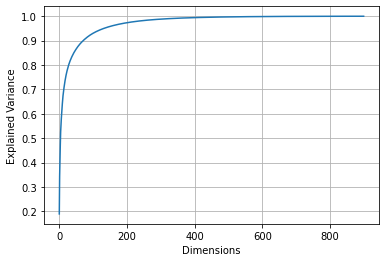

In [52]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
dim = np.argmax(cumsum >= 0.95) + 1
plt.xlabel('Dimensions')
plt.ylabel('Explained Variance')
plt.grid()
plt.plot(cumsum)

- training the model

In [86]:
num_components = 200
pca = PCA(n_components=num_components).fit(X_train)
X_pca_train = pca.transform(X_train)
X_pca_test = pca.transform(X_test)

In [61]:
def plot_figures(data, n_row=3, n_col=4, height=h, width=w):
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(data[i].reshape((height, width)), cmap=plt.cm.gray)
        plt.xticks(())
        plt.yticks(())

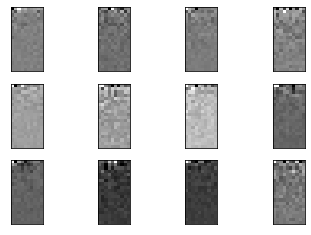

In [84]:
plot_figures(X_train, height=20, width=10)

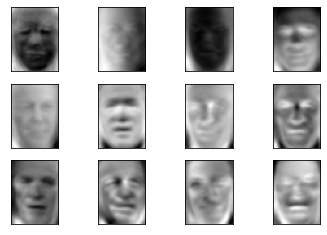

In [62]:
eigenfaces = pca.components_.reshape((num_components, h, w))
plot_figures(eigenfaces)

In [63]:
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

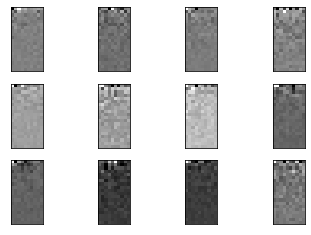

In [72]:
plot_figures(X_reduced,height=20, width=10)

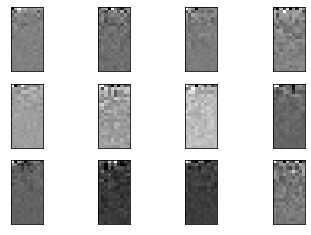

In [75]:
plot_figures(X_recovered, height=20, width=10)

- showing the score

In [114]:
print(pca.score(X_pca_test, y_test))

-1082.212


- Plotting the cumulative variance

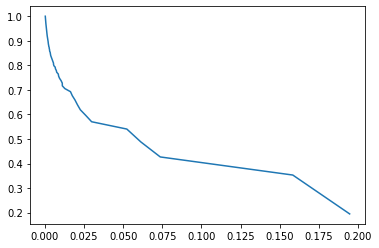

In [85]:
plt.plot(pca.explained_variance_ratio_, np.cumsum(pca.explained_variance_ratio_))

### Applying LDA model

- training the model

In [110]:
lda = LDA(solver='svd', n_components=min(n_features, n_classes - 1))
lda.fit(X_train, y_train)
X_lda_train = lda.transform(X_train)
X_lda_test = lda.transform(X_test)

- showing the score

In [112]:
print(lda.score(X_test, y_test))

0.7002583979328165


- Plotting the cumulative variance rate

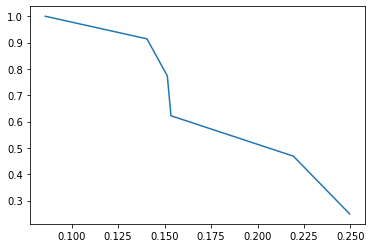

In [95]:
plt.plot(lda.explained_variance_ratio_, np.cumsum(lda.explained_variance_ratio_))

In [111]:
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test) 
value = accuracy_score(y_test, y_pred)


best_k = 0
best_score = 0

for number in range(1, 101):

    classifier = KNeighborsClassifier(n_neighbors = number)
    classifier.fit(X_train, y_train) 
    y_pred = classifier.predict(X_test) 

    value = accuracy_score(y_test, y_pred)

    if value > best_score:
        best_score = value
        best_k = number


print("Percentual do Score: ", best_score)
print("Valor de K para melhor Score: ", best_k)

Percentual do Score:  0.5891472868217055
Valor de K para melhor Score:  6
